# Customizing_Colorbars

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

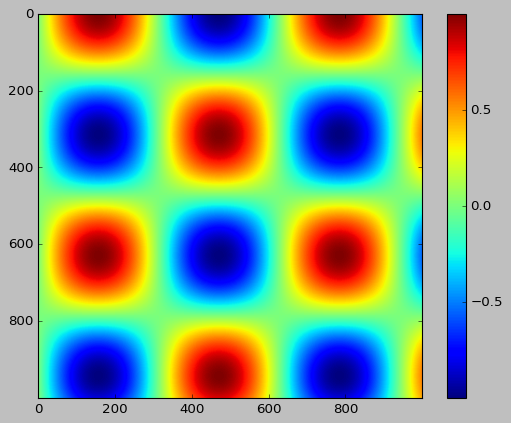

In [2]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

## Customizing Colorbars

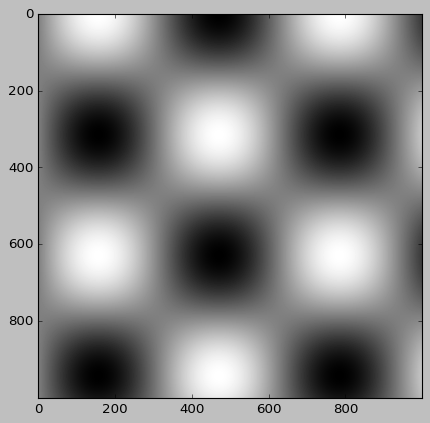

In [3]:
# 색상 지도 지정
plt.imshow(I, cmap='gray');

### Choosing the Colormap

순차적 색상 지도 : 하나의 연속적인 순서를 가지는 색상으로 구성(binary, viridis)  
발산적 색상 지도 : 일반적으로 평균을 기준으로 양수 및 음수 편차를 나타내는 두 가지 구별된 색상 포함(RdBu, PuOr)  
정성적 색상 지도 : 특정 순서 없이 색을 혼합(rainbow, jet)

In [4]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """색상 지도의 회색 조 버전을 반환"""
    cmap = plt.colormaps.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    # RGBA를 감지할 수 있는 회색 조 밝기로 전환
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """색상 지도를 그에 상응하는 회색 조 버전과 함께 플로팅"""
    cmap = plt.colormaps.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

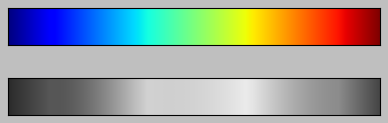

In [5]:
view_colormap('jet')

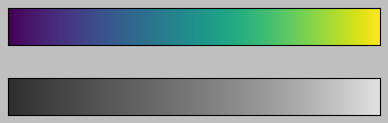

In [6]:
view_colormap('viridis')

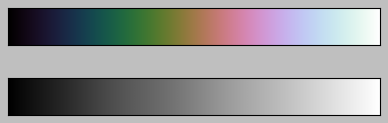

In [7]:
view_colormap('cubehelix')

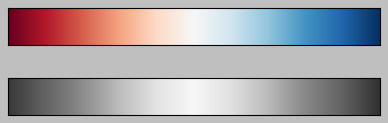

In [8]:
view_colormap('RdBu')

### Color limits and extensions

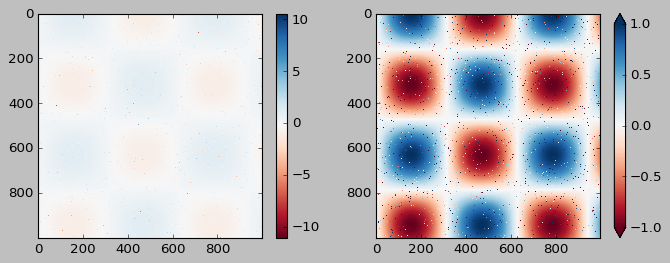

In [9]:
# 이미지 픽셀의 1%의 노이즈 생성
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

### Discrete Color Bars

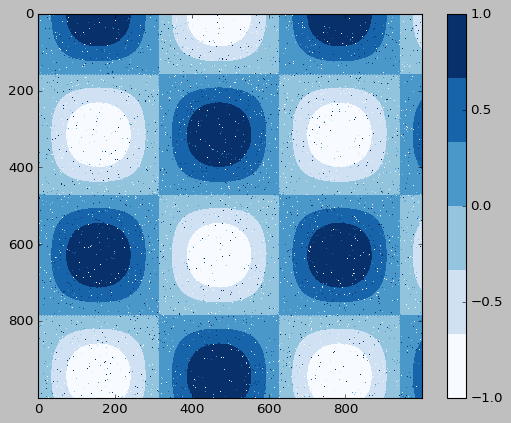

In [10]:
plt.imshow(I, cmap=plt.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

## Example: Handwritten Digits

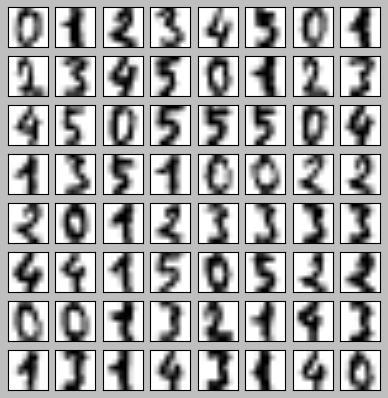

In [11]:
# 0~5까지 숫자의 이미지를 적재하고 그 중 몇 가지를 시각화
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [12]:
# IsoMap을 사용해 숫자를 2차원에 사영
from sklearn.manifold import Isomap
# 그래프 완성 속도를 위해 n_neighbors 파라미터를 늘림
iso = Isomap(n_components=2, n_neighbors=10)
projection = iso.fit_transform(digits.data)

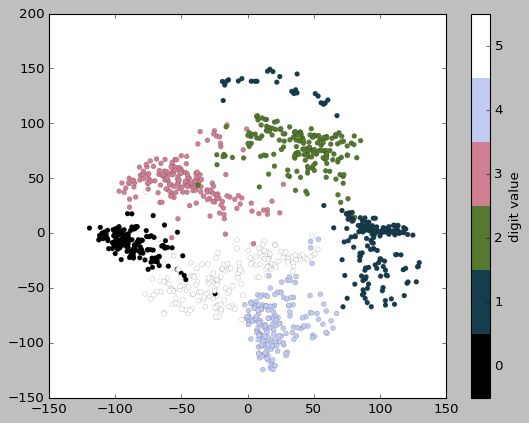

In [13]:
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)